**Problem definition:** The problem to be solved with data mining is to develop a predictive model that can accurately predict whether a customer will make a deposit or not. The bank can benefit from this solution by leveraging the predictive model to identify potential customers who are likely to make a deposit. This can help the bank in targeting their marketing campaigns more effectively, optimizing resource allocation, and improving overall customer acquisition and retention strategies.

In [38]:
##Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

##Loading Dataset
# Load the dataset
df = pd.read_csv('bank 4.csv')

**Exploratory Data Analysis:** 

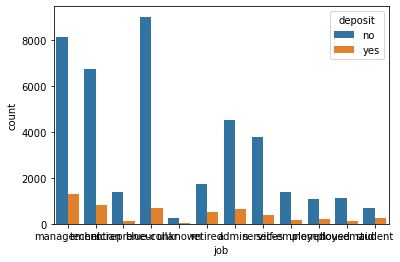

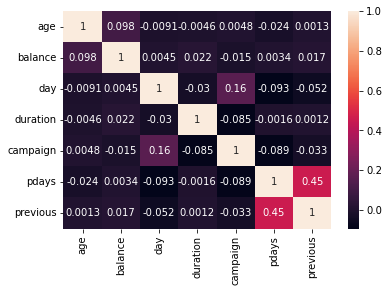

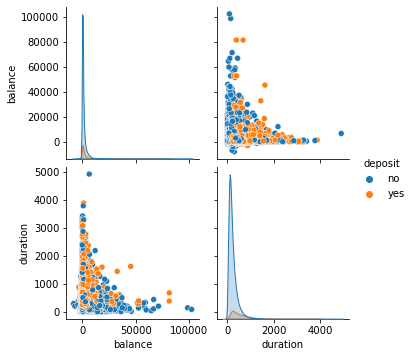

In [39]:
# a) Visualize relationships between the label and some key features
sns.countplot(x='job', hue='deposit', data=df)
plt.show()

# b) Explore correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# c) Conduct univariate and multivariate analysis
sns.pairplot(df, vars=['balance', 'duration'], hue='deposit')
plt.show()

**Feature engineering:** 

In [40]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# Create new features from existing features
df_encoded['balance_duration_ratio'] = df_encoded['balance'] / df_encoded['duration']

**Model selection, training, and validation:** 

In [41]:
# Perform data preprocessing
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Split the data into training and testing sets
X = df_encoded.drop('deposit', axis=1)  # Features
y = df_encoded['deposit']  # Target variable

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test supervised learning models
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

model2 = DecisionTreeClassifier()
model2.fit(X_train_scaled, y_train)

# Train unsupervised learning model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(n_clusters=3)

**Model Evaluation:** 

Model 1 Accuracy: 0.8987061815769103
Model 2 Accuracy: 0.8724980648015039
Confusion Matrix - Model 1:
[[7755  197]
 [ 719  372]]
Confusion Matrix - Model 2:
[[7352  600]
 [ 553  538]]
Classification Report - Model 1:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Classification Report - Model 2:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.47      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.87      0.87      0.87      9043



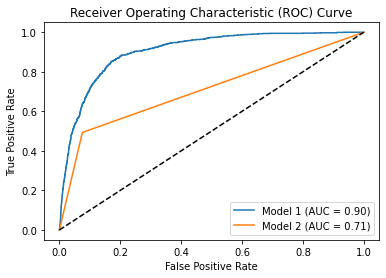

In [42]:
# Model Evaluation
y_pred1 = model1.predict(X_test_scaled)
y_pred2 = model2.predict(X_test_scaled)

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print('Model 1 Accuracy:', accuracy1)
print('Model 2 Accuracy:', accuracy2)

cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

print('Confusion Matrix - Model 1:')
print(cm1)
print('Confusion Matrix - Model 2:')
print(cm2)

report1 = classification_report(y_test, y_pred1)
report2 = classification_report(y_test, y_pred2)

print('Classification Report - Model 1:')
print(report1)
print('Classification Report - Model 2:')
print(report2)

# ROC curves
y_prob1 = model1.predict_proba(X_test_scaled)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob1)

y_prob2 = model2.predict_proba(X_test_scaled)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob2)

# ROC AUC scores
auc1 = roc_auc_score(y_test, y_prob1)
auc2 = roc_auc_score(y_test, y_prob2)

# Plot ROC curves
plt.plot(fpr1, tpr1, label='Model 1 (AUC = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='Model 2 (AUC = {:.2f})'.format(auc2))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
